# 因果图（Causal Graph）

In [1]:
import networkx as nx
# import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
np.random.seed(1000)

## Collider (对撞结构)

- Suppose z is collider, x influence z, and y influence z, no relationship between x and y 

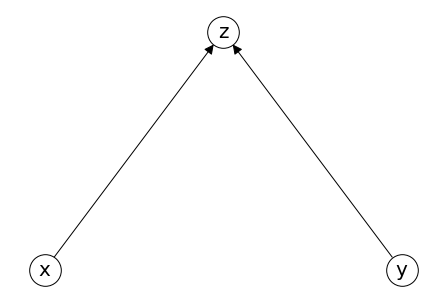

In [8]:
draw_options = {
    "arrowsize": 20,
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True,
}

# 构建有向图并添加结点和边
Collider = nx.DiGraph()
Collider.add_nodes_from(list('xyz'))
Collider.add_edges_from([('x','z'),('y','z')])

pos = {'x': (-0.3,0), 'z': (0,0.2), 'y': (0.3,0)} 

nx.draw(Collider, **draw_options,pos =pos)

In [104]:
# generate x, y
x = 10+50*np.random.randn(100000)
y = -20 + 30*np.random.rand(100000)

print(np.corrcoef(x,y)[0,1])

# generate z
z = x + y + 1.5*np.random.randn(100000)

0.00035713020604406597


-  fit model 
    - (1) $y_i = \alpha + \beta x_i +\epsilon_i$
    - (2) $y_i = \alpha + \beta x_i + \gamma z_i + \epsilon_i$ 

In [105]:
cons = np.array([1]*100000)
fit = sm.OLS(endog = y, exog = np.array([cons,x]).T).fit()
# print(fit.summary())

fit2 = sm.OLS(endog = y, exog = np.array([cons,x,z]).T).fit()
#print(fit2.summary())

# Presenting result
result_table = summary_col(results = [fit, fit2],
                          float_format = '%.4f',
                          model_names = ['Model 1', 'Model 2'],
                          stars = True)
result_table.add_title('Model 1 v.s. Model 2')
print(result_table)


        Model 1 v.s. Model 2
                Model 1    Model 2  
------------------------------------
R-squared      0.0000     0.9709    
R-squared Adj. -0.0000    0.9709    
const          -4.9667*** -0.1411***
               (0.0279)   (0.0054)  
x1             0.0001     -0.9700***
               (0.0005)   (0.0005)  
x2                        0.9702*** 
                          (0.0005)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Fork 

- 混杂变量，confounder

In [5]:
# generate z,x, y
z = 200 + np.random.randn(100000)
x = 10+50*z + np.random.randn(100000)
y = -20 + 30*z + 3*np.random.rand(100000)

print(np.corrcoef(x,y)[0,1])

# # generate z
# z = x + y + 1.5*np.random.randn(100000)

cons = np.array([1]*100000)
fit = sm.OLS(endog = y, exog = np.array([cons,x]).T).fit()
# print(fit.summary())

fit2 = sm.OLS(endog = y, exog = np.array([cons,x,z]).T).fit()
#print(fit2.summary())

# Presenting result
result_table = summary_col(results = [fit, fit2],
                          float_format = '%.4f',
                          model_names = ['Model 1', 'Model 2'],
                          stars = True)
result_table.add_title('Model 1 v.s. Model 2')
print(result_table)

0.9993904949612802
         Model 1 v.s. Model 2
                 Model 1     Model 2  
--------------------------------------
R-squared      0.9988      0.9992     
R-squared Adj. 0.9988      0.9992     
const          -22.8384*** -18.9582***
               (0.6632)    (0.5464)   
x1             0.5998***   0.0016     
               (0.0001)    (0.0027)   
x2                         29.9222*** 
                           (0.1373)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


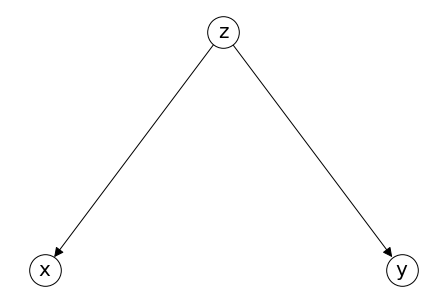

In [5]:
draw_options = {
    "arrowsize": 20,
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True,
}

# 构建有向图并添加结点和边
Collider = nx.DiGraph()
Collider.add_nodes_from(list('xyz'))
Collider.add_edges_from([('z','x'),('z','y')])

pos = {'x': (-0.3,0), 'z': (0,0.2), 'y': (0.3,0)} 

nx.draw(Collider, **draw_options,pos =pos)

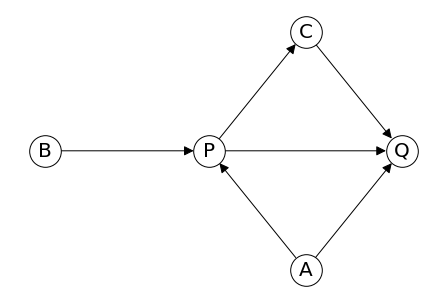

In [37]:
draw_options = {
    "arrowsize": 20,
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True,
}

# 构建有向图并添加结点和边
G = nx.DiGraph()
G.add_nodes_from(list('ABCPQ'))
G.add_edges_from([('P','Q'),('A','P'),('A','Q')])
G.add_edges_from([('P','C'),('C','Q')])
G.add_edges_from([('B','P')])

pos = {'B': (-0.6,0), 'P': (0,0), 'Q': (0.7,0),
        'A':(0.35, -0.1), 'C':(0.35,0.1)}

nx.draw(G, **draw_options,pos =pos)

In [6]:
data_size = 100000
b = 100 + 10*np.random.randn(data_size)
a = 60 + 30*np.random.randn(data_size)
p = 10 + 2*b + 0.8*a + np.random.randn(data_size)
c = 2 + p + np.random.randn(data_size)
q = 400 - p + 0.2*c + 2*a + np.random.randn(data_size)
# total price effect
# q = 400.4 - 0.8*p + 2*a + noise

-  fit model 
    - (1) $q_i = \alpha + \beta p_i +\epsilon_i$
    - (2) $q_i = \alpha + \beta p_i + \gamma a_i + \epsilon_i$ 

In [7]:
cons = np.array([1]*data_size)
fit = sm.OLS(endog = q, exog = np.array([cons,p]).T).fit()
# print(fit.summary())

fit2 = sm.OLS(endog = q, exog = np.array([cons,p, a]).T).fit()
#print(fit2.summary())

# Presenting result
result_table = summary_col(results = [fit, fit2],
                          float_format = '%.4f',
                          model_names = ['Model 1', 'Model 2'],
                          stars = True)
result_table.add_title('Model 1 v.s. Model 2')
print(result_table)

         Model 1 v.s. Model 2
                 Model 1     Model 2  
--------------------------------------
R-squared      0.2268      0.9995     
R-squared Adj. 0.2268      0.9995     
const          142.4987*** 400.3988***
               (1.0080)    (0.0344)   
x1             0.6644***   -0.7999*** 
               (0.0039)    (0.0002)   
x2                         1.9998***  
                           (0.0002)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [14]:
# OLS
# ols_fit = sm.OLS(endog = q, exog = np.array([cons,p]).T).fit()
# 2SLS
iv_fit_1stage = sm.OLS(endog = p, exog = np.array([cons,b]).T).fit()
                       
x_hat = iv_fit_1stage.predict()
iv_fit_2stage = sm.OLS(endog = q, exog = np.array([cons,x_hat]).T).fit()

# control confounder 
# ols_confounder = sm.OLS(data['y'], data[['x','z']]).fit()

# presenting result
# from statsmodels.iolib.summary2 import summary_col

result_table = summary_col(results = [fit, fit2, iv_fit_2stage],
                          float_format = '%.4f',
                          model_names = ['Model1', 'Model 2', 'Model 1 with IV'],
                          stars = True)
result_table.add_title('IV')
print(result_table)
# print(ols_fit.summary())
# print(iv_fit_2stage.summary())

                          IV
                  Model1     Model 2   Model 1 with IV
------------------------------------------------------
R-squared      0.2268      0.9995      0.1325         
R-squared Adj. 0.2268      0.9995      0.1325         
const          142.4987*** 400.3988*** 517.1986***    
               (1.0080)    (0.0344)    (1.6501)       
x1             0.6644***   -0.7999***  -0.7883***     
               (0.0039)    (0.0002)    (0.0064)       
x2                         1.9998***                  
                           (0.0002)                   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Chain 

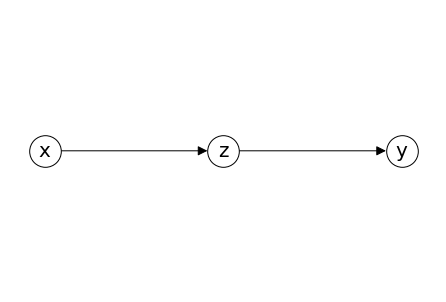

In [3]:
draw_options = {
    "arrowsize": 20,
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True,
}

# 构建有向图并添加结点和边
chain = nx.DiGraph()
chain.add_nodes_from(list('xyz'))
chain.add_edges_from([('x','z'),('z','y')])

pos = {'x': (-0.3,0), 'z': (0,0), 'y': (0.3,0)} 
nx.draw(chain, **draw_options,pos =pos)

In [113]:
data_size = 100000
x = 100 + 10*np.random.randn(data_size)
z = 3*x+  np.random.randn(data_size)
y = 5*z+ np.random.randn(data_size)

-  fit model 
    - (1) $y_i = \alpha + \beta x_i +\epsilon_i$
    - (2) $y_i = \alpha + \beta x_i + \gamma z_i + \epsilon_i$ 

In [114]:
cons = np.array([1]*data_size)
fit = sm.OLS(endog = y, exog = np.array([cons,x]).T).fit()
# print(fit.summary())

fit2 = sm.OLS(endog = y, exog = np.array([cons,x, z]).T).fit()
#print(fit2.summary())

# Presenting result
result_table = summary_col(results = [fit, fit2],
                          float_format = '%.4f',
                          model_names = ['Model 1', 'Model 2'],
                          stars = True)
result_table.add_title('Model 1 v.s. Model 2')
print(result_table)

       Model 1 v.s. Model 2
                Model 1    Model 2 
-----------------------------------
R-squared      0.9988     1.0000   
R-squared Adj. 0.9988     1.0000   
const          0.0181     0.0205   
               (0.1623)   (0.0317) 
x1             14.9997*** 0.0127   
               (0.0016)   (0.0095) 
x2                        4.9957***
                          (0.0032) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Simulation Practice: Quantifying causality in data science with quasi-experiments 

##  IV simu

**causal graph**:
![](https://tingwen-pic.oss-cn-beijing.aliyuncs.com/img/20211030131905.png)

In [2]:
np.random.seed(2021)
z = np.random.randn()

### 1.1 Simu data

In [5]:
import random
random.seed(2021)  #设定种子

In [6]:
# generate IV , X , Z and Y
iv = np.array([random.gauss(10,10) for i in range(5000)])
z = np.array([random.randrange(-30,30) for i in range(5000)])
x = 3*iv + 2*z+ np.array([random.gauss(0,1) for i in range(5000)])
y = 4*x + 6*z + np.array([random.gauss(0,1) for i in range(5000)])

print('IV first 20 data: ')
print(iv[0:20])
print('-'*20)

print('y first 20 data: ')
print(y[0:20])
print('-'*20)

IV first 20 data: 
[ 20.20586392  -6.93081101   2.74935374   7.9373736   -7.82976154
 -10.22917018   6.41968456  10.59498401   8.58104578  21.26374151
  15.07168142   6.92463389  17.90393551  -4.47388035   4.1944725
  -1.18214967  27.76604789  15.89608828   3.46856887  11.36222159]
--------------------
y first 20 data: 
[-186.54764132   89.24934793 -115.40383367  -17.07299347 -192.41523531
 -208.01767037 -220.04205714  259.29547667  398.37124418  213.11254403
  192.87980195  486.78183573   21.63838191  261.54467099 -160.23441493
   50.70465479  292.82361655  485.63725094  195.58686214   34.25125174]
--------------------


In [7]:
import pandas as pd 
df = pd.DataFrame([y,x,z,iv])
data = pd.DataFrame(df.values.T,columns = ['y','x','z','iv'])

### 1.2 Regression

In [8]:
import statsmodels.api as sm

In [9]:
# OLS
ols_fit = sm.OLS(endog = y, exog=x).fit()
# 2SLS
iv_fit_1stage = sm.OLS(endog = x, exog = iv).fit()
x_hat = iv_fit_1stage.predict()
iv_fit_2stage = sm.OLS(endog = y, exog = x_hat).fit()

# control confounder 
ols_confounder = sm.OLS(data['y'], data[['x','z']]).fit()

# presenting result
from statsmodels.iolib.summary2 import summary_col

result_table = summary_col(results = [ols_fit, iv_fit_2stage, ols_confounder],
                          float_format = '%.4f',
                          model_names = ['OLS', '2SLS','control confounder'],
                          stars = True)
result_table.add_title('OLS v.s. 2SLS')
print(result_table)
# print(ols_fit.summary())
# print(iv_fit_2stage.summary())

              OLS v.s. 2SLS
      OLS       2SLS   control confounder
-----------------------------------------
x                      4.0001***         
                       (0.0003)          
x1 5.1567*** 3.9553***                   
   (0.0211)  (0.0800)                    
z                      6.0000***         
                       (0.0010)          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### 1.3 simulating cofficient for 200 times

In [10]:
def reg_result():
    # generate IV , X , Z and Y
    iv = np.array([random.gauss(10,10) for i in range(5000)])
    z = np.array([random.randrange(-30,30) for i in range(5000)])
    x = 3*iv + 2*z+ np.array([random.gauss(0,1) for i in range(5000)])
    y = 4*x + 5*z + np.array([random.gauss(0,1) for i in range(5000)])
    
    # regression

    ols_fit = sm.OLS(endog = y, exog=x).fit()
    # 2SLS
    iv_fit_1stage = sm.OLS(endog = x, exog = iv).fit()
    x_hat = iv_fit_1stage.predict()
    iv_fit_2stage = sm.OLS(endog = y, exog = x_hat).fit()
    return ols_fit.params[0], iv_fit_2stage.params[0]


ols = []
tsls = []
for i in range(500):
    a,b=reg_result()
    ols.append(a)
    tsls.append(b)



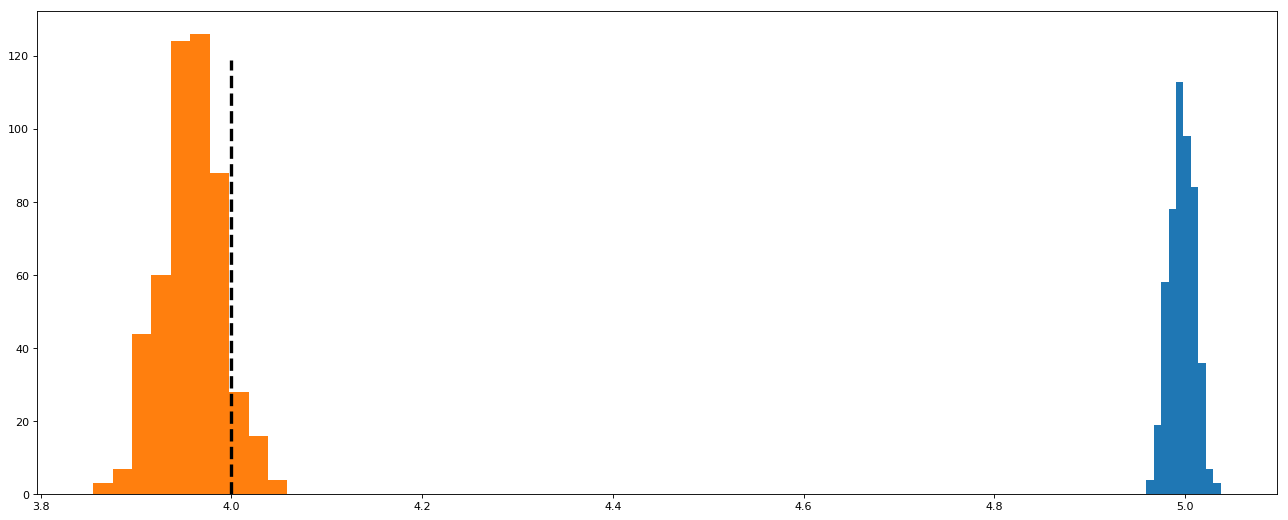

In [11]:
from matplotlib import pyplot as plt
true_effect  = 4
x = [true_effect]*120
y = range(0,120)
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y, '--', color='black',linewidth = 3)

plt.hist(ols)
plt.hist(tsls)
plt.show()

In [12]:
# 如果IV 影響y呢？ relax Exclusion Restriction

def reg_result():
    # generate IV , X , Z and Y
    iv = np.array([random.gauss(10,10) for i in range(5000)])
    z = np.array([random.randrange(-30,30) for i in range(5000)])
    x = 3*iv + 2*z+ np.array([random.gauss(0,1) for i in range(5000)])
    y = 4*x + 5*z + 4*iv+ np.array([random.gauss(0,1) for i in range(5000)])
    
    # regression

    ols_fit = sm.OLS(endog = y, exog=x).fit()
    # 2SLS
    iv_fit_1stage = sm.OLS(endog = x, exog = iv).fit()
    x_hat = iv_fit_1stage.predict()
    iv_fit_2stage = sm.OLS(endog = y, exog = x_hat).fit()
    return ols_fit.params[0], iv_fit_2stage.params[0]


ols = []
tsls = []
for i in range(500):
    a,b=reg_result()
    ols.append(a)
    tsls.append(b)



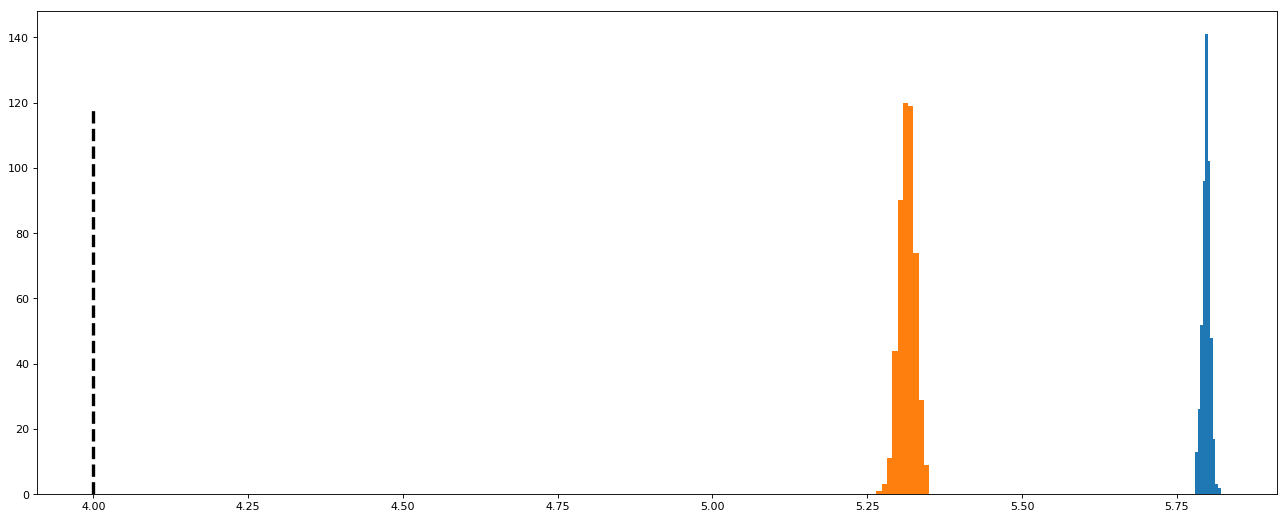

In [13]:
from matplotlib import pyplot as plt
true_effect  = 4
x = [true_effect]*120
y = range(0,120)
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y, '--', color='black',linewidth = 3)

plt.hist(ols)
plt.hist(tsls)
plt.show()